<a href="https://colab.research.google.com/github/phantom-balance/HybridEnergy/blob/master/main_electricity_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/solar-measurements_nepal_jumla_wb-esmap_qc.csv')

<ipython-input-17-7665e0c55cee>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/solar-measurements_nepal_jumla_wb-esmap_qc.csv')


In [ ]:
data['time'] = pd.to_datetime(data['time'])
year_to_extract = 2019  # Replace with the year you want to extract
extracted_data = data[data['time'].dt.year == year_to_extract]

In [ ]:
extracted_data = extracted_data[['time', 'ghi', 'air_temperature']]

In [ ]:
extracted_data.describe()

,time,ghi,air_temperature
count,525600,525600.000000,525600.000000
mean,2019-07-02 11:59:29.999999488,218.270507,11.596737
min,2019-01-01 00:00:00,0.000000,-9.100000
25%,2019-04-02 05:59:45,0.000000,4.800000
50%,2019-07-02 11:59:30,0.000000,12.800000
75%,2019-10-01 17:59:15,381.400000,17.700000
max,2019-12-31 23:59:00,1550.000000,30.400000
std,NaN,320.104918,8.241668


In [ ]:
# Set 'time' column as index
extracted_data.set_index('time', inplace=True)

# Resample to hourly frequency and calculate mean
hourly_avg_data = extracted_data.resample('H').mean()

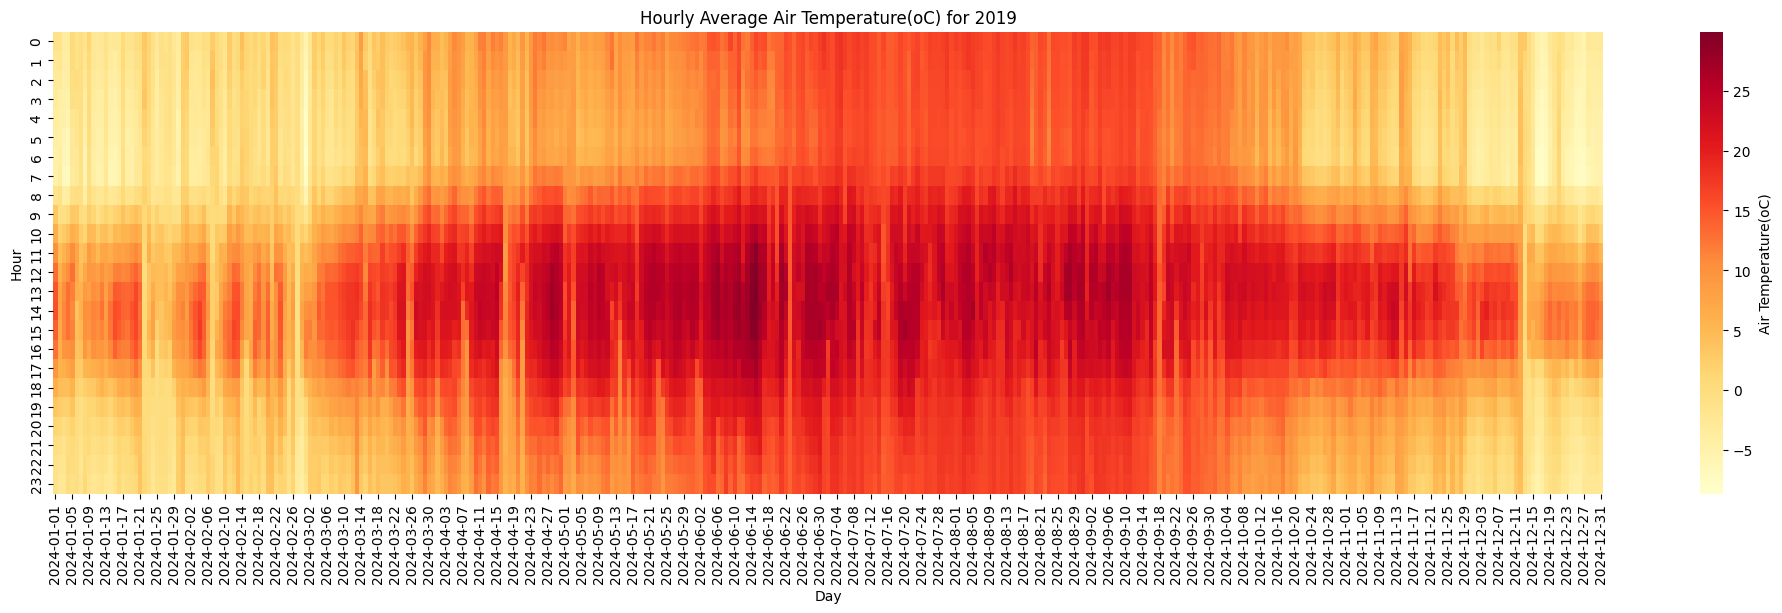

In [ ]:
# prompt: make a heatmap graph of entire year where xaxis is the days and yaxis is the 24 hours of each day

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to have days as columns and hours as rows
heatmap_data = hourly_avg_data.pivot_table(index=hourly_avg_data.index.hour, columns=hourly_avg_data.index.date, values='air_temperature')

# Create the heatmap
plt.figure(figsize=(25, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Air Temperature(oC)'})
plt.title('Hourly Average Air Temperature(oC) for {}'.format(year_to_extract))
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()


In [ ]:
import pandas as pd
# Change year to 2024
hourly_avg_data.index = hourly_avg_data.index.map(lambda t: t.replace(year=2024))

# Repeat data till 2044
repeated_data = pd.DataFrame()
for year in range(2024, 2045):
  temp_data = hourly_avg_data.copy()
  temp_data.index = temp_data.index.map(lambda t: t.replace(year=year))
  repeated_data = pd.concat([repeated_data, temp_data])

# print(repeated_data)
solar_data_2024_2044=repeated_data
solar_data_2024_2044.to_csv('solar_data_2024_2044.csv')

#GRAPHS

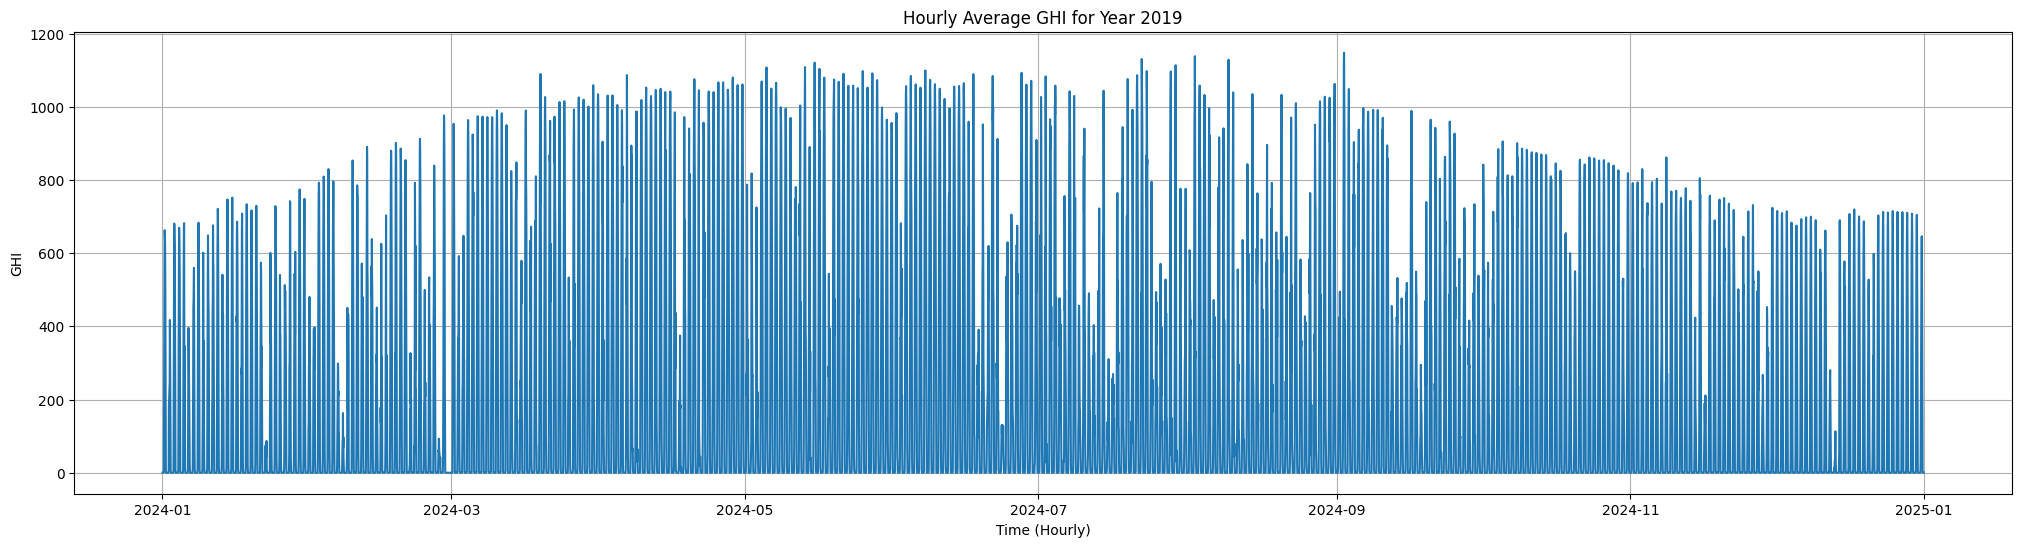

In [ ]:
import matplotlib.pyplot as plt

# Plot GHI for all months
plt.figure(figsize=(25, 6))  # Adjust figure size as needed
plt.plot(hourly_avg_data.index, hourly_avg_data['ghi'])
plt.xlabel('Time (Hourly)')
plt.ylabel('GHI')
plt.title('Hourly Average GHI for Year {}'.format(year_to_extract))
plt.grid(True)
# plt.xlim(hourly_avg_data.index.min(), hourly_avg_data.index.max()+1)

plt.show()

ValueError: could not convert string to float: '2025-january'

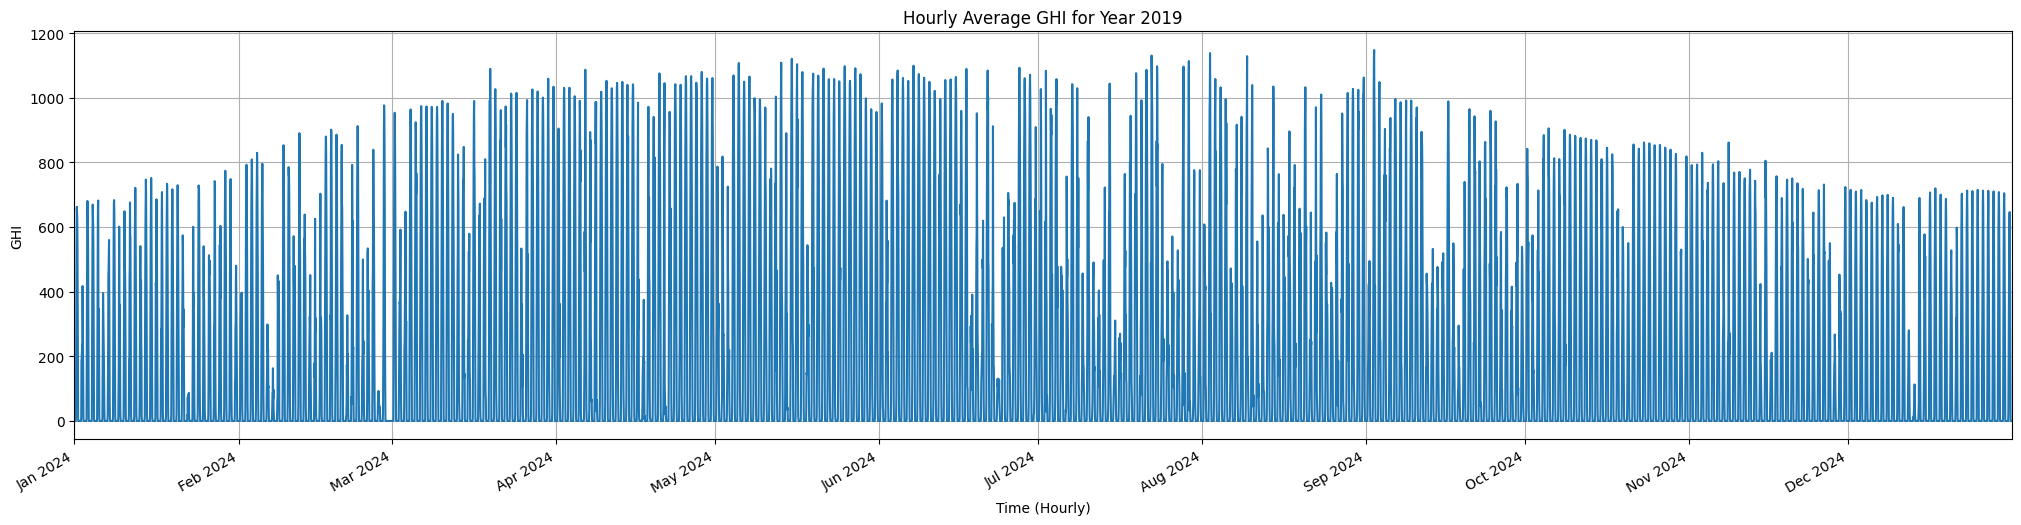

In [ ]:
# prompt: import matplotlib.pyplot as plt
# # Plot GHI for all months
# plt.figure(figsize=(15, 6))  # Adjust figure size as needed
# plt.plot(hourly_avg_data.index, hourly_avg_data['ghi'])
# plt.xlabel('Time (Hourly)')
# plt.ylabel('GHI')
# plt.title('Hourly Average GHI for Year {}'.format(year_to_extract))
# plt.grid(True)
# plt.show()
# write the last xtick as 2025-01

# ... (previous code)

# Plot GHI for all months
import matplotlib.dates as mdates

# ... (Your existing code)

# Plot GHI for all months
fig, ax = plt.subplots(figsize=(25, 6))  # Adjust figure size as needed
ax.plot(hourly_avg_data.index, hourly_avg_data['ghi'])

# Format x-axis to show more dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Time (Hourly)')
plt.ylabel('GHI')
plt.title('Hourly Average GHI for Year {}'.format(year_to_extract))
plt.grid(True)
fig.autofmt_xdate()  # Rotate and align the date labels
plt.xlim(hourly_avg_data.index.min(), hourly_avg_data.index.max())


# Modify x-ticks
xticks = plt.xticks()[0]
xticks[-1] = '2025-january'  # Replace the last xtick label
plt.xticks(xticks)

plt.show()


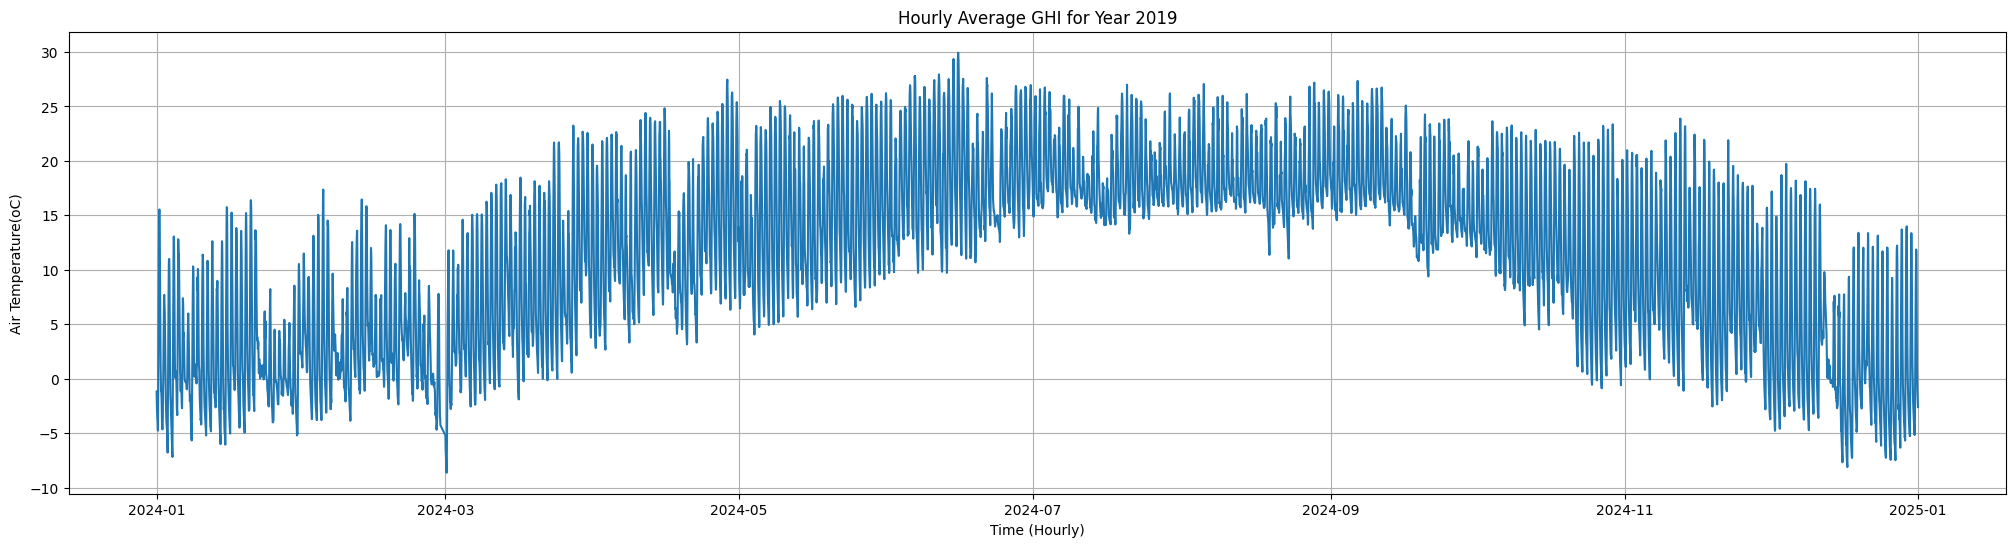

In [ ]:
# Plot temp for all months
plt.figure(figsize=(25, 6))  # Adjust figure size as needed
plt.plot(hourly_avg_data.index, hourly_avg_data['air_temperature'])
plt.xlabel('Time (Hourly)')
plt.ylabel('Air Temperature(oC)')
plt.title('Hourly Average GHI for Year {}'.format(year_to_extract))
plt.grid(True)
plt.show()

In [ ]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


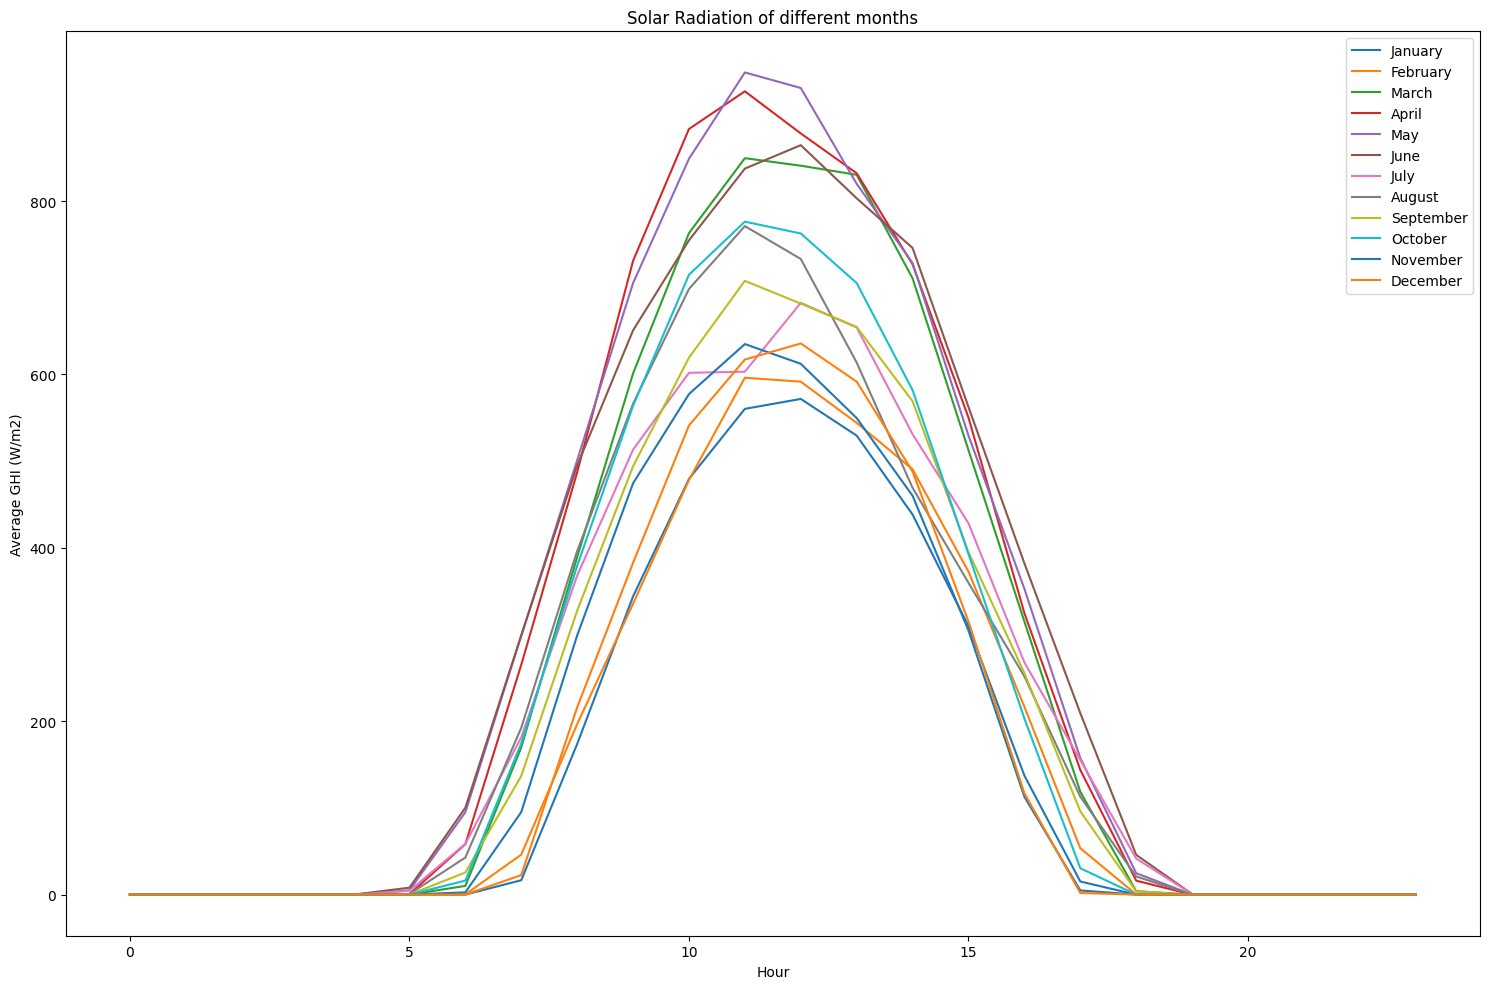

In [ ]:
import matplotlib.pyplot as plt

# Extract month and hour information
hourly_avg_data['month'] = hourly_avg_data.index.month
hourly_avg_data['hour'] = hourly_avg_data.index.hour

# Calculate monthly average hourly data
monthly_avg_data = hourly_avg_data.groupby(['month', 'hour']).mean().reset_index()

plt.figure(figsize=(15, 10))

for i, month in enumerate(range(1, 13)):
    monthly_data = monthly_avg_data[monthly_avg_data['month'] == month]
    plt.plot(monthly_data['hour'], monthly_data['ghi'],label=month_names[i])

plt.legend()
plt.title(f'Solar Radiation of different months')
plt.xlabel('Hour')
plt.ylabel(f'Average GHI (W/m2)')
plt.tight_layout()
plt.show()

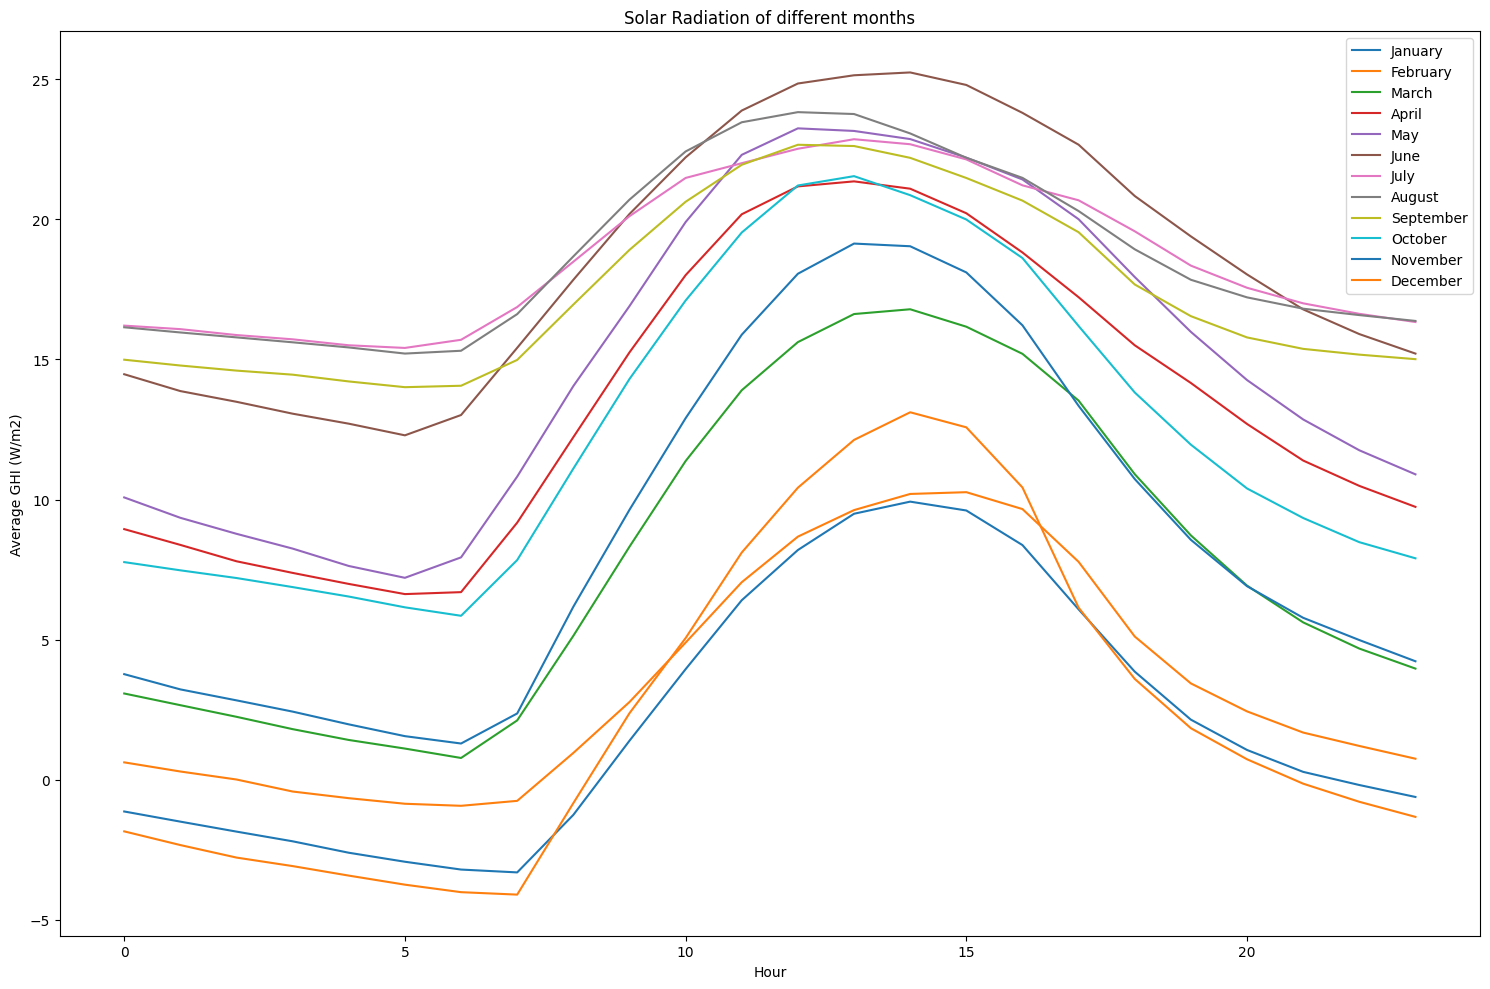

In [ ]:
hourly_avg_data['month'] = hourly_avg_data.index.month
hourly_avg_data['hour'] = hourly_avg_data.index.hour

# Calculate monthly average hourly data
monthly_avg_data = hourly_avg_data.groupby(['month', 'hour']).mean().reset_index()

plt.figure(figsize=(15, 10))

for i, month in enumerate(range(1, 13)):
    monthly_data = monthly_avg_data[monthly_avg_data['month'] == month]
    plt.plot(monthly_data['hour'], monthly_data['air_temperature'],label=month_names[i])

plt.legend()
plt.title(f'Solar Radiation of different months')
plt.xlabel('Hour')
plt.ylabel(f'Average GHI (W/m2)')
plt.tight_layout()
plt.show()

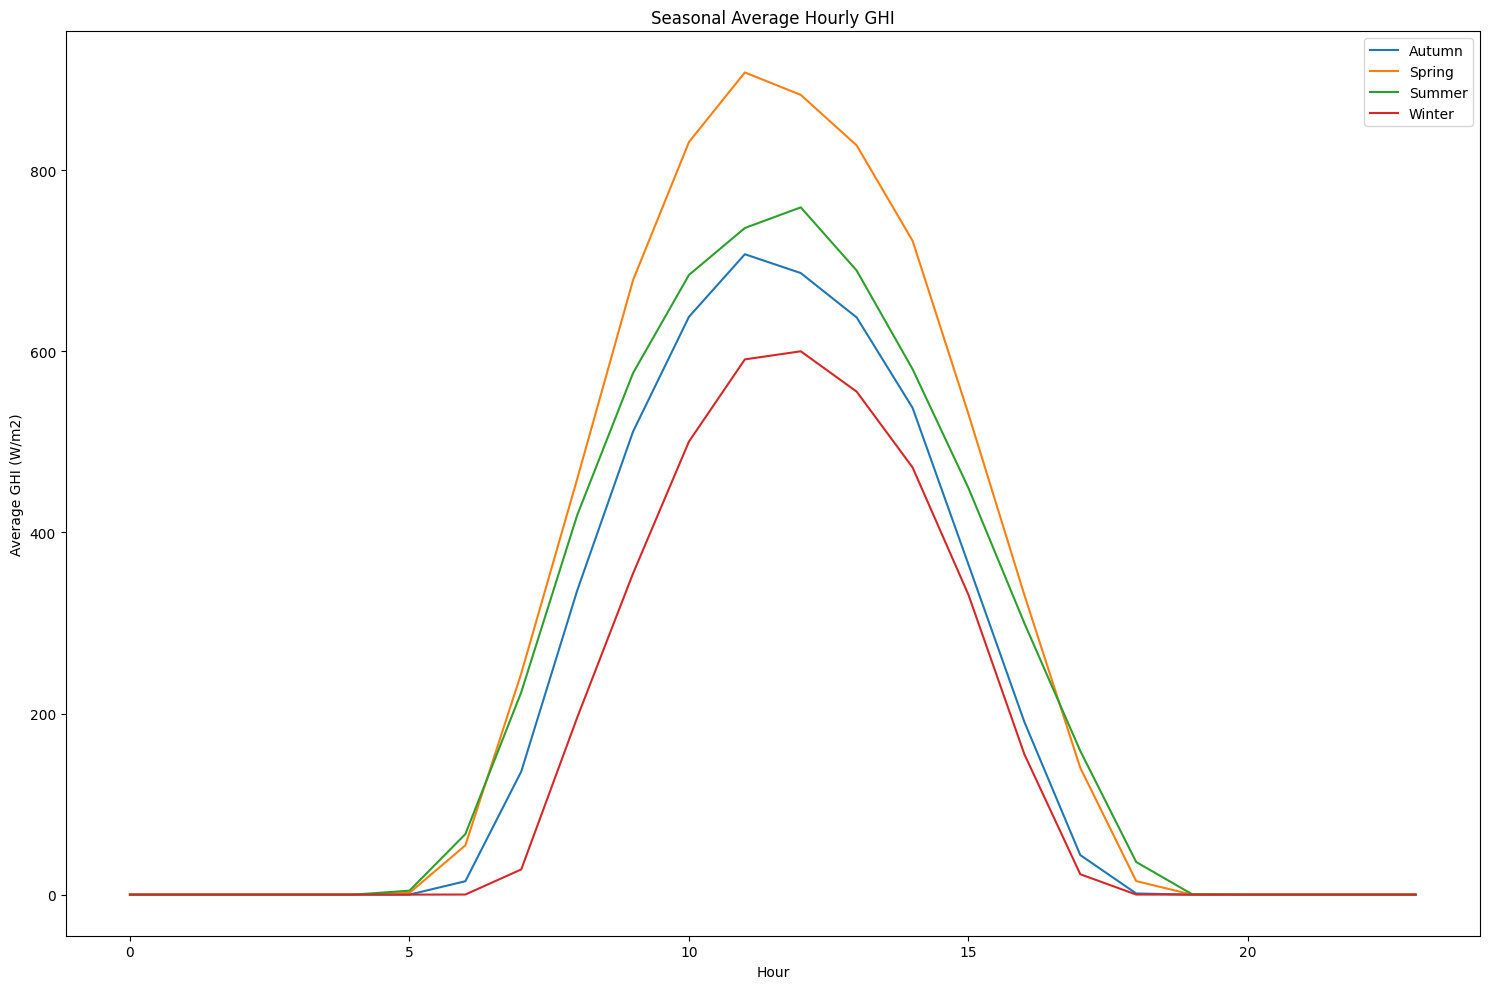

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define seasons
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Map months to seasons
hourly_avg_data['season'] = hourly_avg_data['month'].map(seasons)

# Calculate seasonal average hourly data
seasonal_avg_data = hourly_avg_data.groupby(['season', 'hour']).mean().reset_index()

# Plotting
plt.figure(figsize=(15, 10))

for season in seasonal_avg_data['season'].unique():
    seasonal_data = seasonal_avg_data[seasonal_avg_data['season'] == season]
    plt.plot(seasonal_data['hour'], seasonal_data['ghi'], label=season)

plt.legend()
plt.title('Seasonal Average Hourly GHI')
plt.xlabel('Hour')
plt.ylabel('Average GHI (W/m2)')
plt.tight_layout()
plt.show()
